# RNN_Prediction of DAX movements (or BTC/USD)
In this notebook, I try to make a (quite simple) prediction for Bitcoin / Dax movements using Recurrent Neural Networks (RNN). This notebook is extremly inspired by the Udemy Course "Deep Learning, Neuronale Netze & AI: Der Komplettkurs" by Jannis Seemann, of which I got the BTC/USD data as well. The DAX prices are provided from Thomson Reuters (University license) and thereby organized by myself. To make the predictions better, flexibel, DAX data usable and the predictions to be real predictions (say today how the Dax / Bitcoin will move tomorrow), I had to make several adjustments and additional calculations. The result is shown below:

In [1]:
daysToForecast = 1 # How many days to look ahead?
daysToTakeIntoAccountForForecast = 50 # How many (historic) days to take into account for calculating forecast?

You shouldn't change anything except the values above this line. 

In [2]:
import numpy as np
import pandas as pd

#df = pd.read_csv("Kraken_BTCUSD_d.csv", header=1)
df = pd.read_csv("../data/DAX_DATA/Price_History_daily_50y.csv")
df = df[::-1] # comment this line out if using BTC/USD ... only to use for DAX data

shift = daysToForecast
days = daysToTakeIntoAccountForForecast

df["Close_after"] = df["DAX 30 PERFORMANCE - PRICE INDEX"].shift(shift)
df["Close_changes"] = (df["Close_after"] / df["DAX 30 PERFORMANCE - PRICE INDEX"]) - 1
df["Close_changes"] = df["Close_changes"].shift(-1)

df = df.dropna()

changes = df["Close_changes"]

X = []
Y = []

for i in range(shift, len(changes) - days):
    Y.append(changes[i])
    X.append(np.array(changes[i+1:i+1+days][::-1]))
    
X = np.array(X).reshape(-1, days, 1)
Y = np.array(Y)

In [3]:
X2 = []
Y2 = []
df2 = pd.read_csv("../data/Kraken_BTCUSD_d.csv", header=1)
df2["Close_after"] = df2["Close"].shift(shift)
df2["Close_changes"] = (df2["Close_after"] / df2["Close"]) - 1
df2["Close_changes"] = df2["Close_changes"].shift(-1)

df2 = df2.dropna()

changes2 = df2["Close_changes"]

for i in range(shift, len(changes) - days):
    Y2.append(changes[i])
    X2.append(np.array(changes[i+1:i+1+days][::-1]))
    
X2 = np.array(X2).reshape(-1, days, 1)
Y2 = np.array(Y2)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(1, input_shape=(50, 1)))

model.compile(optimizer="rmsprop", loss="mse")
model.fit(X, Y, batch_size=32, epochs=15)

Epoch 1/15
406/406 [==============================] - 4s 11ms/step - loss: 1.6174e-04
Epoch 2/15
406/406 [==============================] - 5s 12ms/step - loss: 1.5409e-04
Epoch 3/15
406/406 [==============================] - 5s 11ms/step - loss: 1.5292e-04
Epoch 4/15
406/406 [==============================] - 4s 11ms/step - loss: 1.5272e-04
Epoch 5/15
406/406 [==============================] - 4s 11ms/step - loss: 1.5261e-04
Epoch 6/15
406/406 [==============================] - 4s 10ms/step - loss: 1.5258e-04
Epoch 7/15
406/406 [==============================] - 4s 10ms/step - loss: 1.5265e-04
Epoch 8/15
406/406 [==============================] - 4s 10ms/step - loss: 1.5252e-04
Epoch 9/15
406/406 [==============================] - 4s 10ms/step - loss: 1.5255e-04
Epoch 10/15
406/406 [==============================] - 4s 10ms/step - loss: 1.5244e-04
Epoch 11/15
406/406 [==============================] - 4s 9ms/step - loss: 1.5249e-04
Epoch 12/15
406/406 [==============================] 

In [5]:
predictions = model.predict(X)
predictions = predictions.reshape(-1)
predictions = np.append(predictions, np.zeros(days))
predictions = np.append(np.zeros(shift), predictions)

df["predictions"] = predictions
df["Close_predicted"] = df["Close_after"] * (1 + df["predictions"])

You shouldn't change anything except the the values (x1 and x2) below this line. The represent the range which shall be plotted in the next step.

In [6]:
x1 = 0 # change these two values to change the plotted range
x2 = 80 # x1 has to be less / before x2

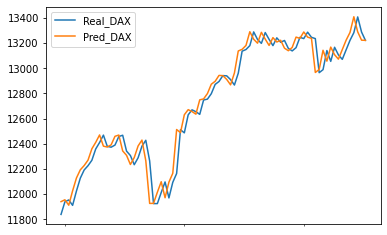

In [7]:
# https://matplotlib.org/gallery/text_labels_and_annotations/date.html

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

dates = np.array(df.index).astype(np.datetime64)

plt.plot(df.index[x1:x2], df["DAX 30 PERFORMANCE - PRICE INDEX"][x1:x2], label="Real_DAX")
plt.plot(df.index[x1:x2], df["Close_predicted"][x1:x2], label="Pred_DAX")

plt.legend()

plt.show()

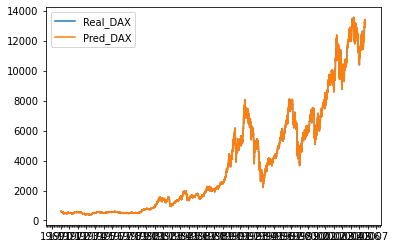

In [8]:
# https://matplotlib.org/gallery/text_labels_and_annotations/date.html

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

dates = np.array(df2.index).astype(np.datetime64)

plt.plot(df.index, df["DAX 30 PERFORMANCE - PRICE INDEX"], label="Real_DAX")
plt.plot(df.index, df["Close_predicted"], label="Pred_DAX")

plt.legend()

plt.show()